#### Importing Libraries 

In [37]:
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading Files

In [2]:
cdg = pd.read_csv("D:/Internship/Dataset/customerdemographic.csv")

#### Using Basic pandas function to view data and its contents

In [3]:
cdg.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
cdg.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [5]:
cdg.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-1.00E+02,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


In [6]:
cdg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [7]:
cdg.shape

(4000, 13)

In [8]:
cdg.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [9]:
cdg.duplicated().sum()

0

#### Dealing with the Null Values of the Dataset

In [10]:
cdg.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [11]:
cdg = cdg.dropna()

In [12]:
cdg.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

#### Dropping the default  column since it has no informative values

In [13]:
del(cdg['default'])

In [14]:
cdg.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

#### Dealing with the gender values and make it standardize (like dealing with issues like F, femal for the entry of Female )

In [15]:
gender = cdg.groupby(['gender'])
gender.size()

gender
F            1
Femal        1
Female    1366
Male      1262
dtype: int64

In [16]:
cdg['gender'] = cdg['gender'].replace(['F','Femal'],['Female','Female'])

In [17]:
gender = cdg.groupby(['gender'])
gender.size()

gender
Female    1368
Male      1262
dtype: int64

#### Extracting Age from DOB column

In [18]:
  
born='1953-10-12'
print("Born :",born)
  
#Identify given date as date month and year
born = datetime.strptime(born, "%Y-%m-%d").date()
  
#Get today's date
today = date.today()
  
print("Age :",
      today.year - born.year - ((today.month,
                                          today.day) < (born.month,
                                                        born.day)))

Born : 1953-10-12
Age : 69


In [19]:
for i in cdg['DOB']:

    print(i)
    born = i 
    born = datetime.strptime(born, "%Y-%m-%d").date()
  
    #Get today's date
    today = date.today()
    j = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    cdg['DOB'] = cdg['DOB'].replace([i],[j])
 


1953-10-12
1980-12-16
1954-01-20
1973-03-10
1988-10-11
1994-07-21
1955-02-15
1983-03-25
2000-07-13
2001-04-15
1980-08-13
1980-09-20
1977-12-03
1976-12-02
1978-06-10
1978-09-25
1973-09-30
1968-06-22
1962-11-24
1995-04-20
1963-09-28
1985-12-22
1955-10-29
1979-04-16
1981-10-27
1976-04-14
1977-03-28
1983-03-01
1981-10-18
1975-09-23
1992-10-22
1980-10-01
1959-12-05
1954-04-18
1966-07-24
1956-09-24
1996-07-04
1967-07-04
1959-11-29
1965-07-03
1978-03-25
1976-04-01
2002-03-11
1993-02-27
1985-01-27
1972-02-13
1978-07-15
1978-01-23
1989-09-12
1985-03-12
1968-10-02
1978-04-24
1965-06-28
1967-02-26
1989-03-04
1974-04-23
1966-02-03
1967-01-22
1984-11-12
1955-02-24
1980-09-11
1976-07-16
1974-08-07
1960-12-25
1968-08-31
1979-07-27
1998-06-13
1968-05-11
1975-12-29
1956-11-27
1997-04-21
1978-06-06
2001-09-17
1990-07-01
1975-08-12
1985-10-23
1999-02-05
1982-02-23
1978-09-02
1957-10-02
1979-04-19
1988-12-03
1995-05-03
1960-03-17
1992-10-15
1974-12-03
1977-07-17
1985-07-20
1997-07-18
1964-10-16
1963-07-07

1959-06-25
1968-08-19
1995-09-25
1970-11-01
1977-04-04
1988-01-22
1981-03-16
1989-09-30
1962-04-27
2000-01-08
1973-07-28
1959-09-12
1969-02-28
1974-05-21
1969-12-31
1965-05-13
1986-03-22
1973-02-04
1953-08-09
1994-05-31
1960-10-05
2001-11-02
1997-10-01
1965-01-16
1986-05-11
1972-06-19
1978-04-21
1973-11-24
1989-10-01
1971-02-16
1987-07-22
1979-06-03
1990-08-25
1983-02-27
1994-07-11
1974-07-31
1977-11-16
1966-01-10
1964-06-07
1998-11-15
1962-08-12
1978-01-24
1968-07-07
1980-11-15
1994-08-23
1976-01-28
1975-06-28
1960-10-23
1979-10-07
1967-08-08
1980-08-16
1980-10-07
1997-01-25
1989-03-11
1981-02-12
1974-04-06
1991-03-10
1998-05-03
1970-03-01
1956-04-12
1970-09-06
1986-12-20
1984-10-06
1994-07-16
1986-02-09
1970-02-23
1990-03-06
1973-01-18
1994-07-05
2001-10-16
1978-02-22
1968-08-25
1966-02-23
1995-11-25
1981-09-02
1987-03-24
1973-08-23
1998-10-23
1988-03-08
1978-12-09
1986-05-18
1979-12-10
1995-11-02
1960-09-11
1970-06-19
1977-12-16
1997-05-07
1957-09-30
1954-12-28
1980-03-31
2000-10-15

1978-03-29
1959-03-24
1993-03-04
1986-07-15
1957-11-07
1979-03-05
1992-03-15
1978-12-27
1958-12-19
1994-12-17
1962-10-15
1959-05-01
1986-03-25
1974-11-03
1972-06-05
1983-12-30
1998-10-18
1975-06-15
1957-05-22
1993-01-22
1996-10-28
1996-03-19
1966-11-18
1977-09-10
1982-05-22
1993-06-15
1987-03-17
1998-10-02
1981-05-05
1956-04-09
1973-02-12
1971-07-05
1978-09-15
1961-07-16
1958-12-17
1997-07-06
1997-05-28
1973-12-28
1964-05-06
1961-04-22
2001-01-11
1981-06-21
1973-08-02
1985-06-10
1978-02-28
1957-06-07
1977-10-25
1960-03-14
1974-08-24
1981-05-26
1943-08-11
1978-11-05
1959-12-29
1970-04-05
1978-07-04
1976-08-26
1954-08-16
1978-11-30
1981-02-20
1980-11-11
1999-12-24
1981-02-21
1961-08-12
1986-03-21
1977-05-01
1983-01-29
1959-09-21
1957-10-13
1990-02-13
1977-05-13
1976-03-11
1992-12-18
1974-06-21
1973-03-09
1975-07-24
1992-08-05
1960-02-13
1975-04-12
1964-04-20
1976-05-17
1980-07-05
1978-01-30
1983-04-06
1980-10-04
1975-07-15
1995-12-12
1978-12-20
1989-06-02
1980-06-08
1956-09-25
1977-03-23

1955-02-06
1976-12-23
1981-03-14
1965-12-18
1977-12-30
1990-02-23
1989-03-23
1957-03-27
1983-02-06
1955-02-09
1977-06-18
1998-12-24
1999-12-17
1965-12-15
1986-07-11
1969-08-06
1983-08-11
1962-02-06
1978-06-15
1974-04-25
1989-06-12
1971-10-14
1994-04-27
1957-05-11
1973-08-16
1978-02-27
1995-10-03
1990-10-08
1971-09-06
1993-02-18
1973-06-18
1975-05-08
1966-04-03
1993-05-16
1963-05-15
1955-03-31
1961-05-04
1957-07-12
1962-03-30
1974-11-08
1958-12-07
1956-10-19
1994-10-13
1993-10-22
1976-06-17
1960-12-16
1960-02-18
1992-06-07
1977-01-07
1961-12-02
1992-03-13
1981-03-21
1959-12-19
1991-08-27
1979-12-03
1961-11-09
1986-08-02
1977-12-05
1990-02-24
1972-04-14
1997-08-21
1994-05-10
1959-07-30
1995-03-04
1973-07-20
1963-06-01
1970-04-13
1971-01-17
1993-01-19
1988-02-02
1974-09-08
1999-02-07
1998-11-07
1977-05-02
1969-06-12
1971-06-09
1993-11-01
1961-10-16
1973-06-13
1974-08-29
1969-04-09
1965-10-06
1962-07-21
1956-08-08
1959-05-31
1976-04-16
1956-06-24
1965-07-27
1979-08-18
1971-01-28
1971-03-06

In [20]:
cdg

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,69,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,42,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,69,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,49,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,34,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,48,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,Female,5,33,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,Male,93,47,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,47,VP Product Management,Health,Mass Customer,N,No,19.0


In [27]:
#renaming the date of birth column
cdg.rename(columns = {'DOB':'Age'}, inplace = True)

In [26]:
cdg.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

#### Basic Visualization of the Dataseet of Customer Demographic

<AxesSubplot:xlabel='gender', ylabel='count'>

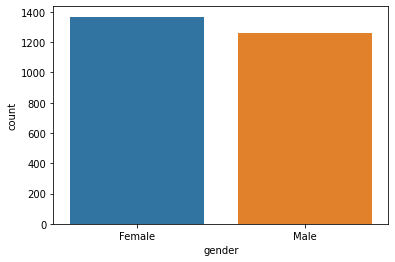

In [21]:
sns.countplot(x= cdg['gender'], data=cdg)

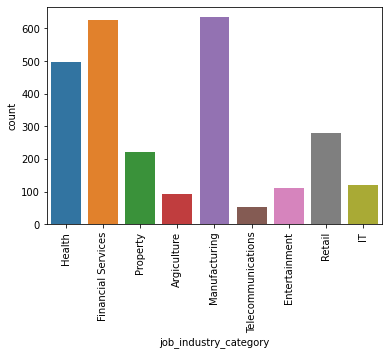

In [48]:
sns.countplot(x= cdg['job_industry_category'], data=cdg)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

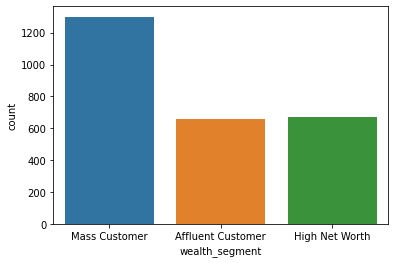

In [63]:
sns.countplot(x= cdg['wealth_segment'], data=cdg)

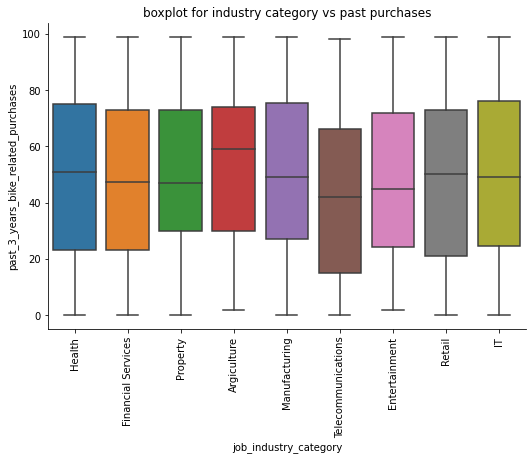

In [71]:
sns.catplot(x= "job_industry_category", y = "past_3_years_bike_related_purchases", data =cdg, kind = "box",aspect = 1.5)
plt.xticks(rotation='vertical')
plt.title("boxplot for industry category vs past purchases")
plt.show()

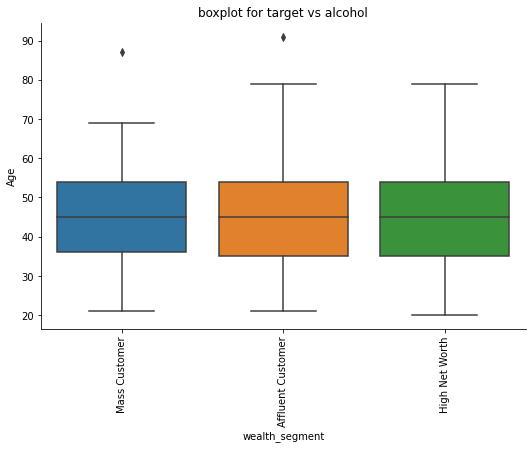

In [70]:
sns.catplot(x= "wealth_segment", y = "Age", data =cdg, kind = "box",aspect = 1.5)
plt.xticks(rotation='vertical')
plt.title("boxplot for target vs alcohol")
plt.show()